<a href="https://colab.research.google.com/github/sky16k/fps-3/blob/main/%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D1%81%D1%82%D0%B0%D1%82_2_testing_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

С помощью статистических критериев сравнить динамику заболеваемости
Гипотеза: “Динамика заболеваемости в России отличается от динамики заболеваемости в Соединённых штатах”
1. найти статистические критерии для динамических рядов
2. вычислить эти критерии
3. сравнить (равны/не равны)
4. сделать выводы и отчёт

1. ряды 'confirmed' и 'deaths' в отдельных таблицах по странам :
  - моментные, 
  - равномерные, 
  - изолированные, 
  - абсолютных величин.

  показатели изменения уровней :
  - абсолютное изменение (абсолютный прирост): dy[i] = y[i] - y[i-1]
  - относительное изменение(темп роста или индекс динамики): Iy[i]=y[i]/y[i-1]
  - темп изменения (темп прироста): Ty[i] = Iy[i] - 100%

Подключение библиотек

In [1]:
import pandas as pd
import seaborn as sns   #работа с красивыми графиками
import matplotlib.pyplot as plt   #работа с графиками

Загрузка и просмотр данных

In [2]:
df = pd.read_excel('FPS_hw_2_df_2_COVID-19.xlsx',index_col='date')
df#.head()
#len(df)

,country,confirmed,deaths
date,,,
2020-01-22,Russia,0,0
2020-01-22,US,1,0
2020-01-23,Russia,0,0
2020-01-23,US,1,0
2020-01-24,Russia,0,0
...,...,...,...
2021-07-30,US,34945468,613013
2021-07-31,Russia,6185249,155952
2021-07-31,US,34978276,613157


Формирование выборок по странам

In [3]:
# Формирование выборок
df1 = df[df['country'] == 'US']
df2 = df[df['country'] == 'Russia']

print('длинна Выборки US : ', len(df1) )
print('длинна Выборки Russia : ', len(df2))
print('Выборки имеют одинаковую длинну: ', len(df1) == len(df2))

длинна Выборки US :  558
длинна Выборки Russia :  558
Выборки имеют одинаковую длинну:  True


In [4]:
df1['dconf']=df1['confirmed']-df1['confirmed'].shift(1)
df1['ddeath']=df1['deaths']-df1['deaths'].shift(1)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,confirmed,deaths,dconf,ddeath
date,,,,,
2020-01-22,US,1,0,NaN,NaN
2020-01-23,US,1,0,0.0,0.0
2020-01-24,US,2,0,1.0,0.0
2020-01-25,US,2,0,0.0,0.0
2020-01-26,US,5,0,3.0,0.0
...,...,...,...,...,...
2021-07-28,US,34672690,611803,68771.0,387.0
2021-07-29,US,34750860,612124,78170.0,321.0
2021-07-30,US,34945468,613013,194608.0,889.0


In [5]:
df2['dconf']=df2['confirmed']-df2['confirmed'].shift(1)
df2['ddeath']=df2['deaths']-df2['deaths'].shift(1)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,confirmed,deaths,dconf,ddeath
date,,,,,
2020-01-22,Russia,0,0,NaN,NaN
2020-01-23,Russia,0,0,0.0,0.0
2020-01-24,Russia,0,0,0.0,0.0
2020-01-25,Russia,0,0,0.0,0.0
2020-01-26,Russia,0,0,0.0,0.0
...,...,...,...,...,...
2021-07-28,Russia,6116249,153620,21870.0,784.0
2021-07-29,Russia,6138969,154404,22720.0,784.0
2021-07-30,Russia,6161985,155180,23016.0,776.0


In [6]:
df1['leth'] = df1['ddeath']/df1['dconf']
df2['leth'] = df2['ddeath']/df2['dconf']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df1

,country,confirmed,deaths,dconf,ddeath,leth
date,,,,,,
2020-01-22,US,1,0,NaN,NaN,NaN
2020-01-23,US,1,0,0.0,0.0,NaN
2020-01-24,US,2,0,1.0,0.0,0.000000
2020-01-25,US,2,0,0.0,0.0,NaN
2020-01-26,US,5,0,3.0,0.0,0.000000
...,...,...,...,...,...,...
2021-07-28,US,34672690,611803,68771.0,387.0,0.005627
2021-07-29,US,34750860,612124,78170.0,321.0,0.004106
2021-07-30,US,34945468,613013,194608.0,889.0,0.004568


In [8]:
df2

,country,confirmed,deaths,dconf,ddeath,leth
date,,,,,,
2020-01-22,Russia,0,0,NaN,NaN,NaN
2020-01-23,Russia,0,0,0.0,0.0,NaN
2020-01-24,Russia,0,0,0.0,0.0,NaN
2020-01-25,Russia,0,0,0.0,0.0,NaN
2020-01-26,Russia,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...
2021-07-28,Russia,6116249,153620,21870.0,784.0,0.035848
2021-07-29,Russia,6138969,154404,22720.0,784.0,0.034507
2021-07-30,Russia,6161985,155180,23016.0,776.0,0.033716


Визуализация

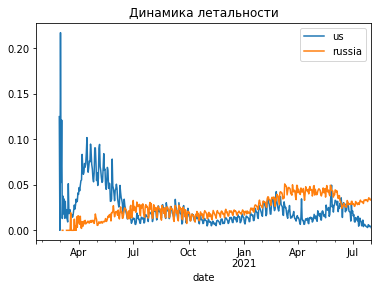

In [9]:
#sns.distplot(df1['Height'],50)
#sns.distplot(df2['Height'],50)
df1['leth'].plot(label='us')
df2['leth'].plot(label='russia')
plt.title('Динамика летальности')
plt.legend() #['Male', 'Female']
plt.show()

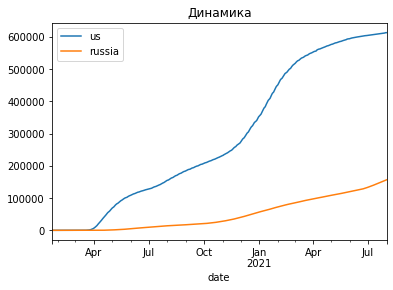

In [10]:
df1['deaths'].plot(label='us')
df2['deaths'].plot(label='russia')
plt.title('Динамика')
plt.legend()  #['Male', 'Female']
plt.show()